In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../blinkit_data.csv')
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isna().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [5]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [6]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


### Cleaning operation - replace LF with Low Fat

In [7]:
df.loc[df['Item Fat Content'] == 'LF', 'Item Fat Content'] = 'Low Fat'
df.loc[df['Item Fat Content'] == 'low fat', 'Item Fat Content'] = 'Low Fat'
df.loc[df['Item Fat Content'] == 'reg', 'Item Fat Content'] = 'Regular'

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### Calculate total sales

In [9]:
total_sales = df['Sales'].sum()
print(f'Total sales: {total_sales}')

Total sales: 1201681.4808


### Calculate average sales

In [10]:
average_sales = df['Sales'].mean()
print(f'Average sales: {average_sales}')

Average sales: 140.9927819781767


### Calculate median sales

In [11]:
median_sales = df['Sales'].median()
print(f'Median sales: {median_sales}')

Median sales: 143.0128


### Find distinct number of items sold

In [12]:
no_distinct_items = df['Item Identifier'].nunique()
print(f'Number of distinct items: {no_distinct_items}')

Number of distinct items: 1559


### Find average overall rating

In [13]:
average_rating = df['Rating'].mean()
print(f'Average rating: {average_rating}')

Average rating: 3.965857092573038


In [15]:
df_fat = df.groupby('Item Fat Content').agg({'Item Identifier': 'count', 'Rating': 'mean', 'Sales': 'sum'}).reset_index()

In [17]:
df_fat.rename(columns={'Item Identifier': 'Number of Items','Rating': 'Average Rating'}, inplace=True)

In [18]:
df_fat

,Item Fat Content,Number of Items,Average Rating,Sales
0,Low Fat,5517,3.966286,776319.6784
1,Regular,3006,3.965070,425361.8024


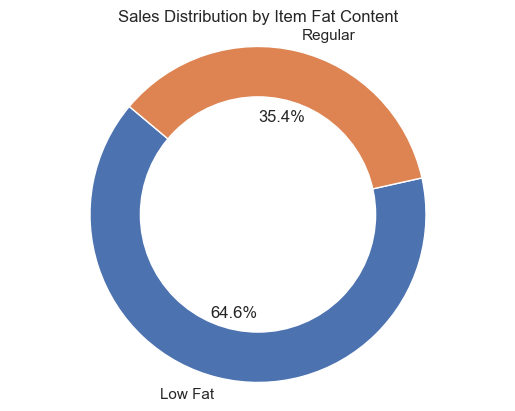

In [23]:
plt.pie(df_fat['Sales'], labels=df_fat['Item Fat Content'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sales Distribution by Item Fat Content')
# Draw a white circle at the center of the pie chart
circle = plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.show()

Text(0.5, 1.0, 'Average Rating by Item Fat Content')

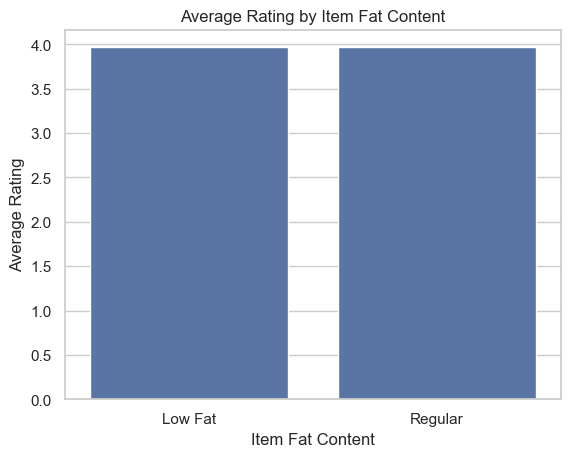

In [26]:
sns.barplot(x='Item Fat Content', y='Average Rating', data=df_fat)
plt.title('Average Rating by Item Fat Content')